In [58]:
# 多合约数据地址
pd.set_option('display.max_columns', None)
pd.set_option('expand_frame_repr', False)
import os
path = r'E:\repo\ml_bt\MA'
all_path = [os.path.join(path,x) for x in os.listdir(path) if 'MA' in x]
all_path

['E:\\repo\\ml_bt\\MA\\MA1801.csv',
 'E:\\repo\\ml_bt\\MA\\MA1805.csv',
 'E:\\repo\\ml_bt\\MA\\MA1809.csv',
 'E:\\repo\\ml_bt\\MA\\MA1901.csv',
 'E:\\repo\\ml_bt\\MA\\MA1905.csv',
 'E:\\repo\\ml_bt\\MA\\MA1909.csv',
 'E:\\repo\\ml_bt\\MA\\MA2001.csv',
 'E:\\repo\\ml_bt\\MA\\MA2005.csv',
 'E:\\repo\\ml_bt\\MA\\MA2009.csv',
 'E:\\repo\\ml_bt\\MA\\MA2101.csv',
 'E:\\repo\\ml_bt\\MA\\MA2105.csv',
 'E:\\repo\\ml_bt\\MA\\MA2109.csv',
 'E:\\repo\\ml_bt\\MA\\MA2201.csv',
 'E:\\repo\\ml_bt\\MA\\MA2205.csv']

In [59]:
# 读取常量数据文件

import json
with open("MA_PARAM.json",'r') as load_f:
    load_dict = json.load(load_f)
late_n_profit = load_dict['late_n_profit'] 
cut_point = load_dict['cut_point']
    
late_n_profit,cut_point


(5, 4)

In [60]:
# 将全部的数据存入字典
import pandas as pd 
start_end_dic = {}
for e in all_path[:-1]:
    data = pd.read_csv(e,index_col=0)
    grag_volume= data.describe([0.1,0.25,0.3,0.4,0.5]).T.loc['volume','50%']
    grag_open_interest = data.describe([0.1,0.25,0.3,0.4,0.5]).T.loc['open_interest','40%']
    grag_open_interest2 = data.describe([0.1,0.25,0.3,0.4,0.5]).T.loc['open_interest','50%']
#     print(e,grag_volume,grag_open_interest,grag_open_interest2)
    data1 = data.copy()
    for i in data1.index:
        if data1.loc[i,'open_interest']>30000:
            start1 = i
            break
    for i in data1.index[::-1]:
        if 'MA2201' in e:
            end1 = len(data1)
            break
        if data1.loc[i,'open_interest']<60000 and data1.loc[i-1,'open_interest']>60000:
            end1 = i
            break
    print(e,start1,end1)
    data2 = data1.iloc[start1:end1,:]
    start_end_dic[e] = (start1,end1,data)


E:\repo\ml_bt\MA\MA1801.csv 5147 17185
E:\repo\ml_bt\MA\MA1805.csv 5180 17024
E:\repo\ml_bt\MA\MA1809.csv 4182 16912
E:\repo\ml_bt\MA\MA1901.csv 3897 17061
E:\repo\ml_bt\MA\MA1905.csv 4761 17383
E:\repo\ml_bt\MA\MA1909.csv 4316 17177
E:\repo\ml_bt\MA\MA2001.csv 2809 17211
E:\repo\ml_bt\MA\MA2005.csv 2843 15334
E:\repo\ml_bt\MA\MA2009.csv 3855 14600
E:\repo\ml_bt\MA\MA2101.csv 2472 14080
E:\repo\ml_bt\MA\MA2105.csv 4559 15625
E:\repo\ml_bt\MA\MA2109.csv 5120 15653
E:\repo\ml_bt\MA\MA2201.csv 2731 14577


In [61]:
# 获取 dx dy
za_dict = {"start":0,"end":0}

import matplotlib.pyplot as plt
from CreateFeatures import * 
import copy
import pandas as pd
dX = pd.DataFrame()
dY = pd.Series()
# 放入循环处理
for key,value in start_end_dic.items():
#     取单个数据
    start = value[0]
    
    end = value[1]        
    data = value[2]
#     print(start,end)
#     成交量处理
    med = np.median(data.volume)
    factor = np.where(data.volume<10*med,10*med,data.volume)
    data['volume'] = factor
#     计算收益率
    data['close_shift(-n)'] = data['close'].shift(-late_n_profit)
    data['return'] = data['close_shift(-n)']-data['close']
    
#     查看收益的分布
#     print(data.iloc[start:end,:].describe().T)
#     收益的概率分布图
#     fig =plt.figure(figsize=(12,8))
#     data.iloc[start:end,:]['return'].plot(kind='kde',color='r')
#     查看K线走势
#     fig =plt.figure(figsize=(12,8))
#     data.iloc[start:end,:]['close'].plot(figsize=(12,8))
    
#     处理标签
    data.loc[:,'label'] = 0
    data.loc[data['return']>=cut_point,'label'] = 1
    data.loc[data['return']<=-cut_point,'label'] = -1
    
#     构建因子
    data1 = copy.deepcopy(data)
    
    data1 = feature1(data1,13)
    data1 = feature1(data1,21)
    data1 = feature1(data1,34)
    data1 = feature1(data1,55)
    data1 = feature1(data1,89)
    data1 = feature1(data1,144)
    data1 = feature1(data1,233)

    data1 = feature2(data1,10)
    data1 = feature2(data1,21)
    data1 = feature2(data1,55)
    data1 = feature2(data1,89)

    data1 = feature3(data1,3)
    data1 = feature3(data1,5)
    data1 = feature3(data1,8)
    data1 = feature3(data1,13)
    data1 = feature3(data1,21)
    data1 = feature3(data1,34)
    data1 = feature3(data1,55)

    data1 = feature4(data1,'date')

    data1 = feature5(data1,55)
    data1 = feature5(data1,70)
    data1 = feature5(data1,89)
    data1 = feature5(data1,144)

    data1 = feature6(data1,8)
    data1 = feature6(data1,13)
    data1 = feature6(data1,21)
    data1 = feature6(data1,34)
    data1 = feature6(data1,55)
    data1 = feature6(data1,89)
    
    data1 = feature8(data1,21)
    data1 = feature8(data1,34)
    data1 = feature8(data1,55)
    data1 = feature8(data1,89)
    
    data1 = feature9(data1,21)
    data1 = feature9(data1,34)
    data1 = feature9(data1,55)
    data1 = feature9(data1,89)
    
    data1 = feature10(data1,21)
    data1 = feature10(data1,34)
    data1 = feature10(data1,55)
    data1 = feature10(data1,89)
    
    data1 = feature11(data1,9)
    data1 = feature11(data1,14)
    
    data1 = feature12(data1,10)
    data1 = feature12(data1,30)
    
    data1 = feature13(data1,9)
    data1 = feature13(data1,21)
    data1 = feature13(data1,34)
    data1 = feature13(data1,55)
#     分割数据
    data1 = data1.iloc[start:end,:]
#     重置索引
    data1 = data1.reset_index(drop=True)
    
    # 获取数据开始时间与结束时间
    if za_dict['start']==0:
        za_dict['start'] = data1.date.tolist()[0]
    else:
        if za_dict['start'] > data1.date.tolist()[0]:
            za_dict['start'] = data1.date.tolist()[0]
            
    if za_dict['end']==0:
        za_dict['end'] = data1.date.tolist()[-1]
    else:
        if za_dict['end'] < data1.date.tolist()[-1]:
            za_dict['end'] = data1.date.tolist()[-1]
#     print(data)
    
#     特征因子
    col_list = [x for x in list(data1.columns) if 'feature' in x]
#     特征矩阵
    X = data1[col_list]
#     标签
    Y = data1['label']
#     特征矩阵缺失值情况
#     print(X.isnull().sum())
#     标签的缺失值情况
#     print(Y.isnull().sum())
#     合并数据
    dX = pd.concat([dX,X],axis=0,ignore_index=True)
    dY = pd.concat([dY,Y],axis=0,ignore_index=True)
#     print(X)
#     print(type(X))
#     break

za_dict

E:\anaconda3\envs\ml_bt\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if __name__ == '__main__':


{'start': '2017-05-04 14:00:00', 'end': '2021-12-03 23:00:00'}

In [62]:
load_dict

{'late_n_profit': 5,
 'cut_point': 4,
 'training_start_time': '2017-05-04 14:00:00',
 'training_end_time': '2021-12-03 23:00:00'}

In [63]:
load_dict['training_start_time'] = za_dict["start"]
load_dict['training_end_time'] = za_dict["end"]
load_dict

{'late_n_profit': 5,
 'cut_point': 4,
 'training_start_time': '2017-05-04 14:00:00',
 'training_end_time': '2021-12-03 23:00:00'}

In [64]:
with open("MA_PARAM.json","w") as f:
    json.dump(load_dict,f)
    print("加载入文件完成...")

加载入文件完成...


In [66]:
dX

,feature1_13,feature1_21,feature1_34,feature1_55,feature1_89,feature1_144,feature1_233,feature2_10,feature2_21,feature2_55,feature2_89,feature3_3,feature3_5,feature3_8,feature3_13,feature3_21,feature3_34,feature3_55,feature4,feature5_55,feature5_70,feature5_89,feature5_144,feature6_8,feature6_13,feature6_21,feature6_34,feature6_55,feature6_89,feature8_21,feature8_34,feature8_55,feature8_89,feature9_21,feature9_34,feature9_55,feature9_89,feature10_21,feature10_34,feature10_55,feature10_89,feature11_9,feature11_14,feature12_10,feature12_30,feature13_9,feature13_21,feature13_34,feature13_55
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.156764,-0.074650,-0.028503,-0.017614,-0.005245,-0.005679,-0.008279,-0.011295,-0.012153,-0.011295,-0.020232,4,-0.649652,-0.771930,-0.707107,-0.466759,-0.284598,-0.152057,-0.063364,-0.022486,-0.015535,-0.011235,-0.008834,-0.010042,-0.012355,-0.020204,0.008834,0.010042,0.012355,0.020204,0.423328,0.481518,0.593121,0.973769,12.295644,19.232314,1.000000,1.000000,5.840472,8.325520,7.735662,10.406292
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.140959,-0.067123,-0.025629,-0.015838,-0.003059,-0.004365,-0.005233,-0.009123,-0.009123,-0.006100,-0.018080,4,-0.606914,-0.764433,-0.677593,-0.476283,-0.184289,-0.123312,-0.047565,-0.012110,-0.013883,-0.010352,-0.006224,-0.007690,-0.009858,-0.017662,0.006224,0.007690,0.009858,0.017662,0.298183,0.368686,0.473136,0.851081,28.940000,29.884507,1.000000,1.000000,5.637178,8.849536,8.311075,10.561413
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.131661,-0.062696,-0.023938,-0.014793,-0.001315,-0.003934,-0.005238,-0.009130,-0.010851,-0.011280,-0.018941,4,-0.624695,-0.752577,-0.668503,-0.503871,-0.184289,-0.123312,-0.056598,-0.022486,-0.014544,-0.010099,-0.006580,-0.008230,-0.010382,-0.018143,0.006580,0.008230,0.010382,0.018143,0.315162,0.394517,0.498224,0.874101,26.662979,28.277958,1.000000,1.000000,5.567764,9.289267,8.887743,10.738082
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.113865,-0.054222,-0.020703,-0.012794,0.001318,-0.003934,-0.004369,-0.009130,-0.012137,-0.009561,-0.018519,4,-0.615922,-0.739940,-0.673086,-0.521450,-0.154377,-0.123312,-0.063364,-0.019028,-0.014213,-0.010225,-0.006002,-0.007951,-0.010046,-0.017758,0.006002,0.007951,0.010046,0.017758,0.287408,0.381072,0.482014,0.855378,26.662979,28.277958,1.000000,1.000000,5.385165,9.353634,9.439789,10.886714
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.110562,-0.052649,-0.020102,-0.012423,-0.002192,-0.002629,-0.006547,-0.009574,-0.011724,-0.013437,-0.015571,4,-0.547659,-0.771930,-0.682025,-0.517116,-0.228191,-0.129088,-0.061110,-0.026807,-0.011900,-0.010478,-0.006754,-0.008863,-0.011068,-0.018657,0.006754,0.008863,0.011068,0.018657,0.323301,0.424725,0.530973,0.898479,23.197898,25.859550,1.000000,1.000000,5.517648,9.724295,9.954084,11.354318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157945,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.260210,0.123910,0.047311,0.029237,0.005204,0.003340,0.012734,0.015015,0.023080,0.024242,0.038004,5,0.874157,0.802043,0.659103,0.048554,0.469155,0.230323,0.137017,0.055279,0.032710,0.009847,0.012716,0.016811,0.024369,0.028190,0.012716,0.016811,0.024369,0.028190,0.657069,0.866925,1.252045,1.445625,75.917353,73.199166,0.637278,0.694498,12.459936,18.445802,20.175787,31.255254
157946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.206269,0.098223,0.037503,0.023176,-0.000371,0.003720,0.009731,0.013905,0.022357,0.020038,0.035303,5,0.858315,0.744242,0.628947,-0.048554,0.376377,0.213869,0.132605,0.045800,0.030399,0.009089,0.009407,0.013961,0.021449,0.025593,0.009407,0.013961,0.021449,0.025593,0.486325,0.720135,1.102357,1.312648,67.867887,67.961137,0.625620,0.693048,10.894698,17.967431,21.065745,31.875463
157947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.155959,0.074266,0.028356,0.017524,0.001113,0.003346,0.008972,0.015043,0.018491,0.024288,0.041683,5,0.891102,0.748454,0.682025,-0.062378,0.351123,0.230323,0.110432,0.055279,0.035680,0.010478,0.008900

In [67]:
dY

0        -1
1        -1
2        -1
3        -1
4        -1
         ..
157945    0
157946    0
157947    0
157948    0
157949    0
Length: 157950, dtype: int64

In [68]:
# 分集
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
#分训练集和测试集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(dX,dY,test_size=0.2,random_state=420)
#恢复索引
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])

In [69]:
#是否有样本不平衡问题？ 有轻微的样本不均衡问题
Ytrain.value_counts()

 0    51683
 1    37710
-1    36967
dtype: int64

In [70]:
Ytest.value_counts()

 0    12920
 1     9494
-1     9176
dtype: int64

In [71]:
#描述性统计
Xtrain.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
feature1_13,126360.0,-3.228870e-03,0.433290,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_21,126360.0,-2.025958e-03,0.369967,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_34,126360.0,-8.784425e-04,0.315840,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_55,126360.0,-5.302311e-04,0.271453,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_89,126360.0,-7.755619e-04,0.241408,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_144,126360.0,-4.194365e-04,0.202451,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_233,126360.0,1.661918e-04,0.169142,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature2_10,126360.0,1.910572e-04,0.161153,-3.387108,-0.440936,-0.238757,-0.163660,-0.073642,0.000362,0.075320,0.165122,0.432247,2.505553
feature2_21,126360.0,9.097963e-05,0.076740,-1.612909,-0.209970,-0.113694,-0.077933,-0.035067,0.000172,0.035867,0.078630,0.205832,1.193121
feature2_55,126360.0,3.473768e-05,0.029301,-0.615838,-0.080170,-0.043410,-0.029756,-0.013389,0.000066,0.013695,0.030022,0.078590,0.455555


In [72]:
Xtest.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
feature1_13,31590.0,-0.002406,0.434723,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_21,31590.0,0.001045,0.371470,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_34,31590.0,-0.000380,0.322723,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_55,31590.0,0.000950,0.272401,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_89,31590.0,-0.000095,0.244409,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_144,31590.0,0.000443,0.203642,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_233,31590.0,-0.001045,0.172408,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature2_10,31590.0,-0.000833,0.163956,-3.013772,-0.443618,-0.240526,-0.166887,-0.075669,-0.000914,0.074350,0.164405,0.442913,2.439703
feature2_21,31590.0,-0.000397,0.078074,-1.435130,-0.211247,-0.114536,-0.079470,-0.036033,-0.000435,0.035405,0.078288,0.210911,1.161763
feature2_55,31590.0,-0.000151,0.029810,-0.547959,-0.080658,-0.043732,-0.030343,-0.013758,-0.000166,0.013518,0.029892,0.080530,0.443582


In [73]:
# 找出分类型特征
classf = [x for x in list(Xtrain.columns) if 'feature1_' in x or 'feature4' in x]
classf

['feature1_13',
 'feature1_21',
 'feature1_34',
 'feature1_55',
 'feature1_89',
 'feature1_144',
 'feature1_233',
 'feature4']

In [74]:
# 找出连续型特征
col = Xtrain.columns.tolist()
for i in classf:
    col.remove(i)
col

['feature2_10',
 'feature2_21',
 'feature2_55',
 'feature2_89',
 'feature3_3',
 'feature3_5',
 'feature3_8',
 'feature3_13',
 'feature3_21',
 'feature3_34',
 'feature3_55',
 'feature5_55',
 'feature5_70',
 'feature5_89',
 'feature5_144',
 'feature6_8',
 'feature6_13',
 'feature6_21',
 'feature6_34',
 'feature6_55',
 'feature6_89',
 'feature8_21',
 'feature8_34',
 'feature8_55',
 'feature8_89',
 'feature9_21',
 'feature9_34',
 'feature9_55',
 'feature9_89',
 'feature10_21',
 'feature10_34',
 'feature10_55',
 'feature10_89',
 'feature11_9',
 'feature11_14',
 'feature12_10',
 'feature12_30',
 'feature13_9',
 'feature13_21',
 'feature13_34',
 'feature13_55']

In [75]:
# 无量纲化
from sklearn.preprocessing import StandardScaler      # 数据转换为均值为0，方差为1的数据  标准化不改变数据的分布，不会把数据变成正态分布
ss = StandardScaler()
ss = ss.fit(Xtrain.loc[:,col])
Xtrain.loc[:,col] = ss.transform(Xtrain.loc[:,col])
Xtest.loc[:,col] = ss.transform(Xtest.loc[:,col])

In [76]:
# 保存无量纲化模型
import joblib
ss_path = "./ss_0302.pkl"
joblib.dump(ss, ss_path)
load_dict['pre_processing_path'] = ss_path 
with open("MA_PARAM.json","w") as f:
    json.dump(load_dict,f)
    print("加载入文件完成...")

加载入文件完成...


In [77]:
Xtrain.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
feature1_13,126360.0,-3.228870e-03,0.433290,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_21,126360.0,-2.025958e-03,0.369967,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_34,126360.0,-8.784425e-04,0.315840,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_55,126360.0,-5.302311e-04,0.271453,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_89,126360.0,-7.755619e-04,0.241408,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_144,126360.0,-4.194365e-04,0.202451,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_233,126360.0,1.661918e-04,0.169142,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature2_10,126360.0,-4.418575e-17,1.000004,-21.019222,-2.737328,-1.482743,-1.016743,-0.458154,0.001062,0.466199,1.023447,2.681041,15.546535
feature2_21,126360.0,-3.939288e-17,1.000004,-21.019222,-2.737328,-1.482743,-1.016743,-0.458154,0.001062,0.466199,1.023447,2.681041,15.546535
feature2_55,126360.0,-4.506349e-17,1.000004,-21.019222,-2.737328,-1.482743,-1.016743,-0.458154,0.001062,0.466199,1.023447,2.681041,15.546535


In [78]:
Xtest.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
feature1_13,31590.0,-0.002406,0.434723,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_21,31590.0,0.001045,0.371470,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_34,31590.0,-0.000380,0.322723,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_55,31590.0,0.000950,0.272401,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_89,31590.0,-0.000095,0.244409,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_144,31590.0,0.000443,0.203642,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_233,31590.0,-0.001045,0.172408,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature2_10,31590.0,-0.006356,1.017395,-18.702561,-2.753972,-1.493724,-1.036770,-0.470735,-0.006855,0.460177,1.018995,2.747222,15.137912
feature2_21,31590.0,-0.006356,1.017395,-18.702561,-2.753972,-1.493724,-1.036770,-0.470735,-0.006855,0.460177,1.018995,2.747222,15.137912
feature2_55,31590.0,-0.006356,1.017395,-18.702561,-2.753972,-1.493724,-1.036770,-0.470735,-0.006855,0.460177,1.018995,2.747222,15.137912


In [79]:
# 训练模型
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 查看测试集上的分数
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(n_estimators=200,random_state=30)

clf = clf.fit(Xtrain,Ytrain)
rfc = rfc.fit(Xtrain,Ytrain)
score_c = clf.score(Xtrain,Ytrain)
score_r = rfc.score(Xtrain,Ytrain)

score_c,score_r   # 由结果看出随机森林的效果比单个决策树要好

(1.0, 1.0)

In [80]:
# 查看测试集上的分数
score_c = clf.score(Xtest,Ytest)
score_r = rfc.score(Xtest,Ytest)

score_c,score_r   # 由结果看出随机森林的效果比单个决策树要好score_c = clf.score(Xtest,Ytest)

(0.42557771446660336, 0.5530547641658753)

In [81]:
# 保存模型
import joblib
model_path = "./model_0302.pkl"
joblib.dump(rfc, model_path)
load_dict['model_path'] = model_path 
with open("MA_PARAM.json","w") as f:
    json.dump(load_dict,f)
    print("加载入文件完成...")

加载入文件完成...


In [82]:
col_list= list(Xtrain.columns)
col_list

['feature1_13',
 'feature1_21',
 'feature1_34',
 'feature1_55',
 'feature1_89',
 'feature1_144',
 'feature1_233',
 'feature2_10',
 'feature2_21',
 'feature2_55',
 'feature2_89',
 'feature3_3',
 'feature3_5',
 'feature3_8',
 'feature3_13',
 'feature3_21',
 'feature3_34',
 'feature3_55',
 'feature4',
 'feature5_55',
 'feature5_70',
 'feature5_89',
 'feature5_144',
 'feature6_8',
 'feature6_13',
 'feature6_21',
 'feature6_34',
 'feature6_55',
 'feature6_89',
 'feature8_21',
 'feature8_34',
 'feature8_55',
 'feature8_89',
 'feature9_21',
 'feature9_34',
 'feature9_55',
 'feature9_89',
 'feature10_21',
 'feature10_34',
 'feature10_55',
 'feature10_89',
 'feature11_9',
 'feature11_14',
 'feature12_10',
 'feature12_30',
 'feature13_9',
 'feature13_21',
 'feature13_34',
 'feature13_55']

In [85]:
# 查看模型重要性参数
importance = rfc.feature_importances_

In [94]:
d = dict(zip(col_list,importance))
d1 = sorted(d.items(), key=lambda item:item[1],reverse=True)

In [96]:
array_x = [x[0] for x in d1]
array_y = [x[1] for x in d1]
array_x,array_y

(['feature13_55',
  'feature13_21',
  'feature13_34',
  'feature13_9',
  'feature5_144',
  'feature3_3',
  'feature3_5',
  'feature3_34',
  'feature3_21',
  'feature3_8',
  'feature3_13',
  'feature11_9',
  'feature5_70',
  'feature3_55',
  'feature11_14',
  'feature5_89',
  'feature10_89',
  'feature6_89',
  'feature9_89',
  'feature10_21',
  'feature10_55',
  'feature10_34',
  'feature8_89',
  'feature9_55',
  'feature9_34',
  'feature9_21',
  'feature8_55',
  'feature8_34',
  'feature8_21',
  'feature6_34',
  'feature2_10',
  'feature2_55',
  'feature2_89',
  'feature2_21',
  'feature6_55',
  'feature5_55',
  'feature6_21',
  'feature12_30',
  'feature12_10',
  'feature6_13',
  'feature6_8',
  'feature4',
  'feature1_13',
  'feature1_21',
  'feature1_34',
  'feature1_55',
  'feature1_144',
  'feature1_89',
  'feature1_233'],
 [0.03261474310442734,
  0.03179907111814769,
  0.031201784589060373,
  0.03102172511467074,
  0.030944269957826558,
  0.027709989388520918,
  0.027499824267591

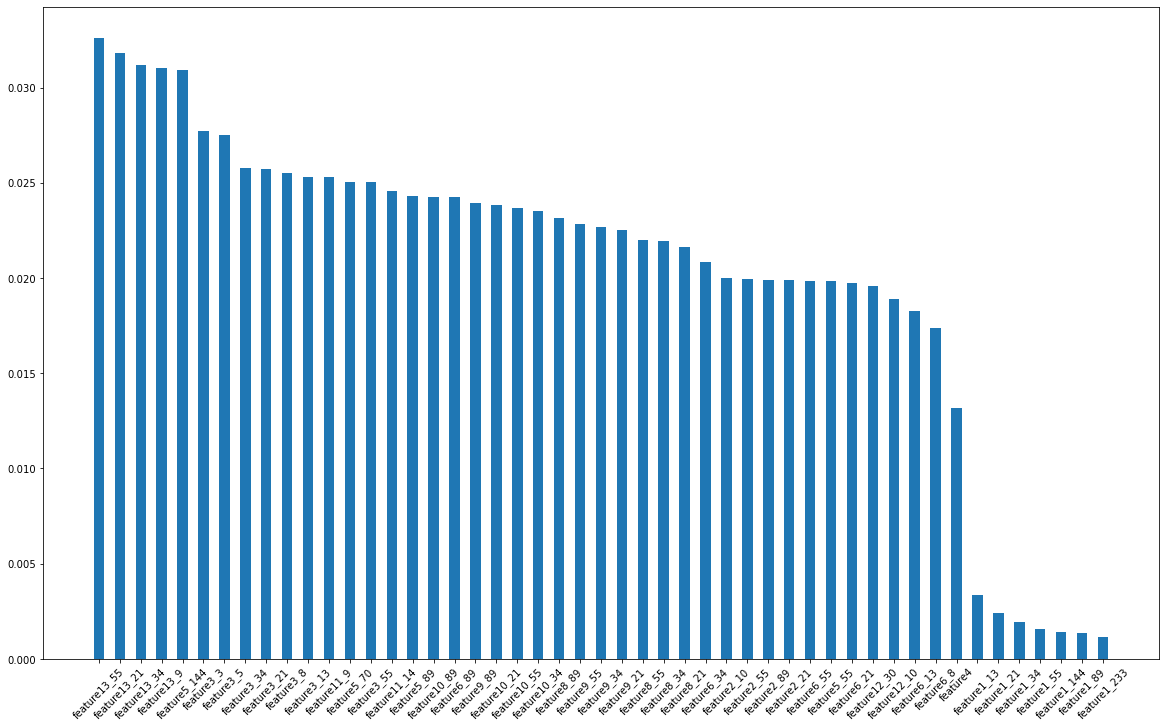

In [100]:
fig = plt.figure(figsize=(20,12))

# 绘图并设置柱子宽度0.5
plt.bar(array_x,array_y, width=0.5)

plt.xticks(rotation=45)
plt.show()

In [101]:
# 预测值
y_predict = rfc.predict(Xtest)

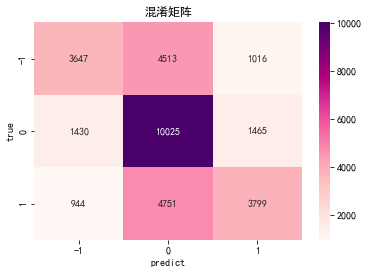

In [102]:
# 模型评估
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cfm = confusion_matrix(Ytest,y_predict,labels=[-1,0,1])
plt.rcParams['font.family']=['sans-serif']
plt.rcParams['font.sans-serif']=['SimHei']
# plt.matshow(cfm)
# plt.show()
f,ax = plt.subplots()
sns.heatmap(cfm,annot=True,ax=ax,xticklabels=[-1,0,1],yticklabels=[-1,0,1],fmt="d",cmap="RdPu")
ax.set_title('混淆矩阵')
ax.set_xlabel('predict')
ax.set_ylabel('true')
plt.show()